<a href="https://colab.research.google.com/github/albaraa-prog/FaceMack-CNN-ML/blob/main/FaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The Dataset is in my Google Drive, therefore I will import it.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Set the path for the dataset
train_dir = '/content/drive/MyDrive/Dataset'
test_dir = '/content/drive/MyDrive/Dataset_Test'

In [ ]:
# Making sure all dataset are imported to the project
import os
print(len(os.listdir('/content/drive/MyDrive/Dataset/with_mask')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/without_mask')))
print(len(os.listdir('/content/drive/MyDrive/Dataset_Test/with_mask')))
print(len(os.listdir('/content/drive/MyDrive/Dataset_Test/without_mask')))

1000
1000
500
500


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Mask vs. No Mask)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 410s 8s/step - accuracy: 0.8893 - loss: 0.2851 - val_accuracy: 0.5000 - val_loss: 0.8835
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 436s 8s/step - accuracy: 0.9003 - loss: 0.2488 - val_accuracy: 0.5000 - val_loss: 0.8714
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 401s 8s/step - accuracy: 0.9176 - loss: 0.2293 - val_accuracy: 0.5000 - val_loss: 1.4330
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 445s 8s/step - accuracy: 0.9230 - loss: 0.2072 - val_accuracy: 0.5000 - val_loss: 1.5715
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 464s 9s/step - accuracy: 0.9169 - loss: 0.2142 - val_accuracy: 0.5100 - val_loss: 1.4171
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 403s 8s/step - accuracy: 0.9206 - loss: 0.2061 - val_accuracy: 0.7900 - val_loss: 0.6166
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 401s 8s/step - accuracy: 0.9177 - loss: 0.1938 - val_accuracy: 0.7925 - val_loss: 0.5223
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 403s 8s/step - accuracy: 0.9403 - loss: 0.1571 - val_accuracy: 0.8725 - v

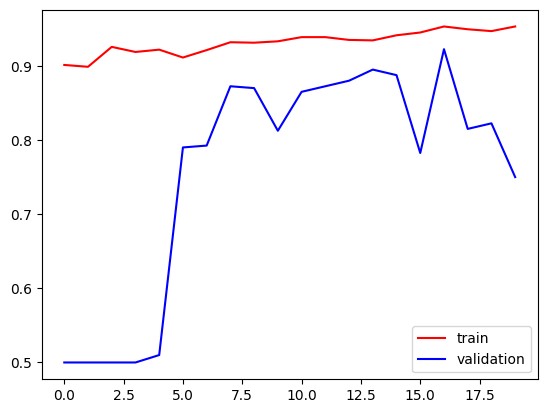

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

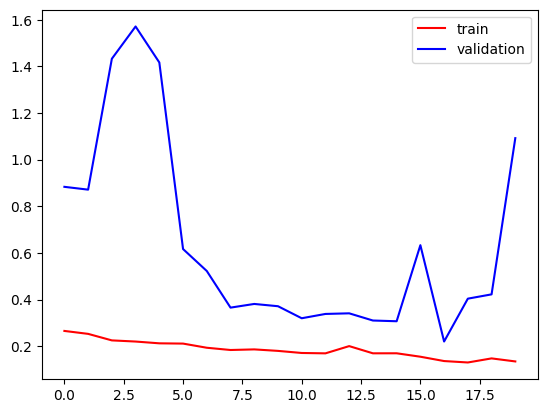

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,  # Separate directory for testing images
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # To not shuffle to align with ground truth order
)


Found 1000 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[497   3]
 [200 300]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       500
           1       0.99      0.60      0.75       500

    accuracy                           0.80      1000
   macro avg       0.85      0.80      0.79      1000
weighted avg       0.85      0.80      0.79      1000

